# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data.csv


In [4]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("/content/Country-data.csv", sep = ",")

In [5]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [6]:
names = df[["country"]].copy()
X = df.drop("country", axis=1)

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [7]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [8]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

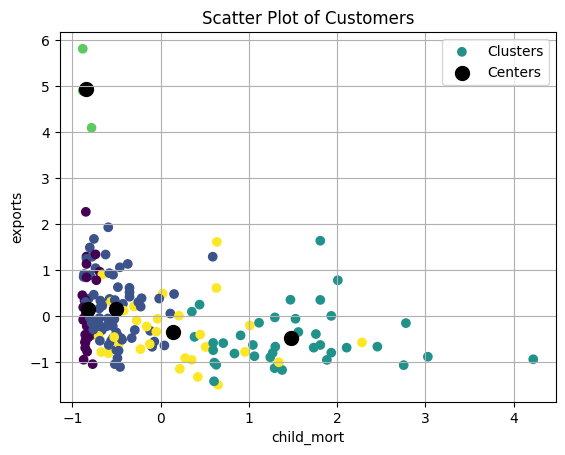

In [9]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [10]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [11]:
# OPTIONAL DO IN 1 LINE OF CODE
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

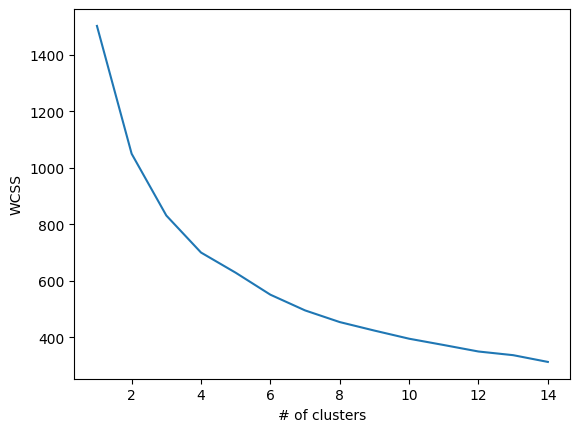

In [12]:
plt.plot(Ks,WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

# 6.) Do the same for a silhoutte plot

In [13]:
from sklearn.metrics import silhouette_score

In [26]:
SSs = []
Ks = range(2, 15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    SSs.append(sil)

In [27]:
kmeans.labels_

array([ 9, 12,  7, 11,  6,  7,  3,  0,  8,  7, 12,  6, 13, 12,  3,  8,  3,
        9,  3,  3, 12,  1, 12,  4, 12,  9,  9,  3,  9,  0,  3,  9,  9, 12,
        7, 12, 13,  9, 11, 12,  9, 12,  6,  6,  8, 12, 12, 13, 12, 11, 13,
        6,  3,  0,  0, 13,  9, 12,  0, 13,  0,  3,  3,  9,  9,  3,  9,  6,
        8, 13,  7,  7, 13,  8,  0,  0,  3,  0,  3,  7, 13,  1,  4,  3, 13,
        6, 12,  1,  1,  7,  6,  2, 12, 13,  9,  6,  6,  9,  2, 11,  6,  1,
       12,  5, 12,  3,  9, 13,  1, 13,  8,  0,  9, 10,  8,  7, 13,  6,  3,
        7,  3, 12,  0,  4, 12,  7,  1,  3,  7, 13, 12,  6,  9,  2,  6,  6,
        1,  1,  6,  0,  7,  3, 13,  3,  8,  8, 13,  9,  6, 13,  1,  3,  3,
       12,  3,  9, 12,  6,  0,  0, 12,  7,  3,  5,  6, 13,  9],
      dtype=int32)

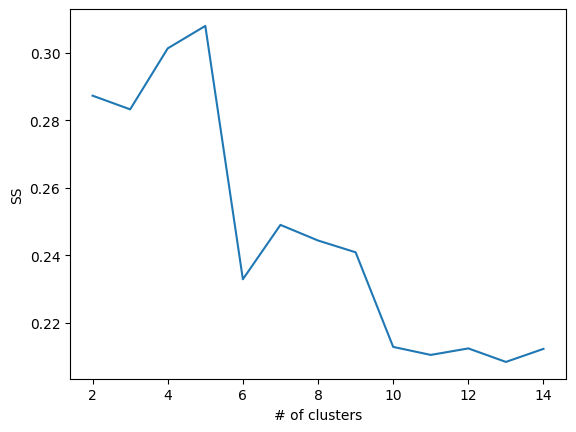

In [28]:
plt.plot(Ks,SSs)
plt.xlabel("# of clusters")
plt.ylabel("SS")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [29]:
kmeans = KMeans(n_clusters = 2, n_init = 30).fit(X_scaled)

In [30]:
preds = pd.DataFrame(kmeans.labels_)

In [31]:
output = pd.concat([preds,df],axis =1)

In [36]:
print("Cluster 1 : ")
list(output.loc[output[0] ==  0, "country"])

Cluster 1 : 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [33]:
print("Cluster 2:")
list(output.loc[output[0] ==  1, "country"])

Cluster 2:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

## Observations:

### Cluster 1 Observations:
- **Diverse Economic Development:** Cluster 1 includes countries with a wide range of economic development levels, from highly developed economies like the United States, United Kingdom, Japan, and Germany to emerging markets such as Brazil, China, and Russia. This suggests that the clustering might not be solely based on current economic performance or GDP levels.
- **Geographical Diversity:** The countries in this cluster are geographically diverse, spanning all continents. This indicates that geographical location was not a determining factor in the clustering process.
- **Variety in Economic Structures:** The cluster comprises countries with various economic structures, including industrialized economies with strong manufacturing sectors, countries known for their service sectors, and nations with significant natural resources. The variables used for clustering might capture aspects of economic structure beyond simple income categorizations.

### Cluster 2 Observations:
- **Lower Income and Developing Countries:** Cluster 2 predominantly consists of lower-income and developing countries. Many of these countries face significant challenges, including lower levels of industrialization, higher poverty rates, and in some cases, political instability. This cluster seems to capture countries with similar developmental challenges.
- **Geographical Concentration in Africa and Asia:** A significant number of countries in this cluster are located in Africa and Asia, regions with many developing and emerging economies. This suggests that the clustering might reflect regional patterns of development and economic challenges.
- **Potential for Growth:** Despite the current challenges, countries in Cluster 2 often have high growth potential. Factors such as young populations, natural resources, and ongoing reforms could drive future economic development.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [40]:
Q8DF = pd.concat([preds, X], axis = 1)

In [41]:
Q8DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [42]:
Q8DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

### Rationale for Choosing Two Clusters:

1. **Distinct Economic Profiles:** The two clusters exhibit significantly different economic profiles. Cluster 0 has much lower child mortality, higher income, longer life expectancy, lower total fertility, and higher GDP per capita (gdpp) compared to Cluster 1. These differences suggest that Cluster 0 consists of countries with higher economic development and better health outcomes than those in Cluster 1.

2. **Variability Within Clusters:** The standard deviation values indicate variability within each cluster. While there is considerable variation in economic indicators within each cluster, the distinction between the clusters in terms of their means suggests that the two clusters capture fundamentally different groups of countries. For example, the wide range in GDP per capita and income within each cluster indicates economic diversity but still maintains a clear distinction between the more developed (Cluster 0) and less developed (Cluster 1) groups.

3. **Economic Development and Policy Implications:** The clear differences in economic indicators such as child mortality, life expectancy, and GDP per capita between the clusters suggest that countries in each cluster face different sets of challenges and policy priorities. Cluster 0 countries might focus on innovation, environmental sustainability, and advanced healthcare, while Cluster 1 countries likely need policies aimed at poverty reduction, basic healthcare improvement, and economic development.

### Economic Interpretation:

- **Cluster 0 (Higher Economic Development):** This cluster includes countries with better health outcomes, higher income levels, and lower inflation rates on average. The countries in this cluster are likely to be more developed and may include many from the OECD. Their higher GDP per capita suggests stronger economic conditions, which correlate with better life expectancy and lower child mortality rates.

- **Cluster 1 (Lower Economic Development):** In contrast, Cluster 1 encompasses countries with higher child mortality, lower income, higher inflation, and lower life expectancy. These characteristics are indicative of developing or underdeveloped countries that may be struggling with economic instability, poor health conditions, and lower levels of income. The higher total fertility rate also suggests different social structures and challenges.

### Conclusion:

Choosing two clusters is justified by the significant differences in economic development and health outcomes between the groups. This clustering approach allows for a broad differentiation between more and less developed countries, providing a useful framework for further analysis and policy formulation. However, it's important to recognize that within each cluster, there is considerable diversity, suggesting that further subdivision or a more nuanced approach might be necessary for specific policy or research purposes. The choice of two clusters provides a starting point for understanding global economic patterns, but deeper dives into each cluster could reveal additional layers of complexity and heterogeneity.